Numpy是Python科学计算的关键包，同时pandas是在Numpy之上建立起来的， 所以我们需要了解Numpy的基础知识。

该章主要了解：
1. Numpy数组
2. 向量化
3. 传播机制
4. 通用函数

## 1. Numpy入门
### 1.1 Numpy数组

当我们相对一个二维数据的每个元素都加上1时， 利用手动相加，代码如下：

In [11]:
matrix = [[1,2,3],[4,5,6], [7,8,9]]

[[i + 1 for i in row] for row in matrix]

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

上述代码可读性很差，关键的是， 在面对更大的多维数组维度时， 遍历整个数组会非常的慢。但是使用Numpy数组则会很快，原因是Numpy是利用C和Fortan写的，这类编译性语言，程序处理速度回快很多

numpy数组都是保存的**同构数据**， 即**每一个元素数据都是相同类型**。

想到了解一个数组的数据类型，可以访问它的dtype属性：

In [12]:
import numpy as np

In [13]:
array1 = np.array([10,100,1000.]) # 构建一个numpy数组
array1.dtype

dtype('float64')

In [14]:
array2 = np.array([10])
array2.dtype

dtype('int32')

## 1.2 向量化和广播
当我们对一个标量和Numpy数组求和， 那么Numpy对执行按元素操作， 这个方式在Numpy社区称之为**向量化**，代码如下

In [15]:
array1 + 1

array([  11.,  101., 1001.])

假如是2个数据相乘，也是同样的道理，Numpy会执行按照元素运算， 代码如下

In [19]:
array2 = np.array([[1,2,3.],[4,5,6.]])
array2 * array2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

假如2个数据形状不同，又该如何做呢？这边引出了Numpy中的**广播机制**

In [17]:
# numpy在可能的情况喜爱自动将较小的数组扩展成较大的数组的形状。
array2 * array1

array([[  10.,  200., 3000.],
       [  40.,  500., 6000.]])

假如array2的维度大小是$2*3$, array1的维度大小是$3*2$,这个可以进行广播吗？


In [18]:
array1 = np.array([[1,2],[2,3],[3,4]])

array2 * array1

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [ ]:
array1 = np.array([[1,2],[2,3],[3,4]])

假如array1的维度大小是4*6呢？


In [ ]:
array1 = np.array([[1,1,1,1,1,1],[2,2,2,2,2,2],[3,3,3,3,3,3],[4,4,4,4,4,4]])

array1 * array2

ValueError: operands could not be broadcast together with shapes (4,6) (2,3) 

上述错误说明， 广播机制需要其中一个数组缺省的维度为1

具体规则：

**规则1**：如果两个数组形状中，只有其中一个维度相同，另一个维度不一致，但是其中一个数组有维度为1，则可以补齐

**规则2**：如果两个数组的形状在任何一个维度都不匹配，但两个数组都有其中以维度为1，则数组的形状会沿着维度为1的维度扩展，以匹配另外一个数组形状

**规则3**：如果两个数组的形状在任何一个维度上都不匹配,并且没有任何一个维度等于1，会广播错误。


上述操作，在excel中也有体现



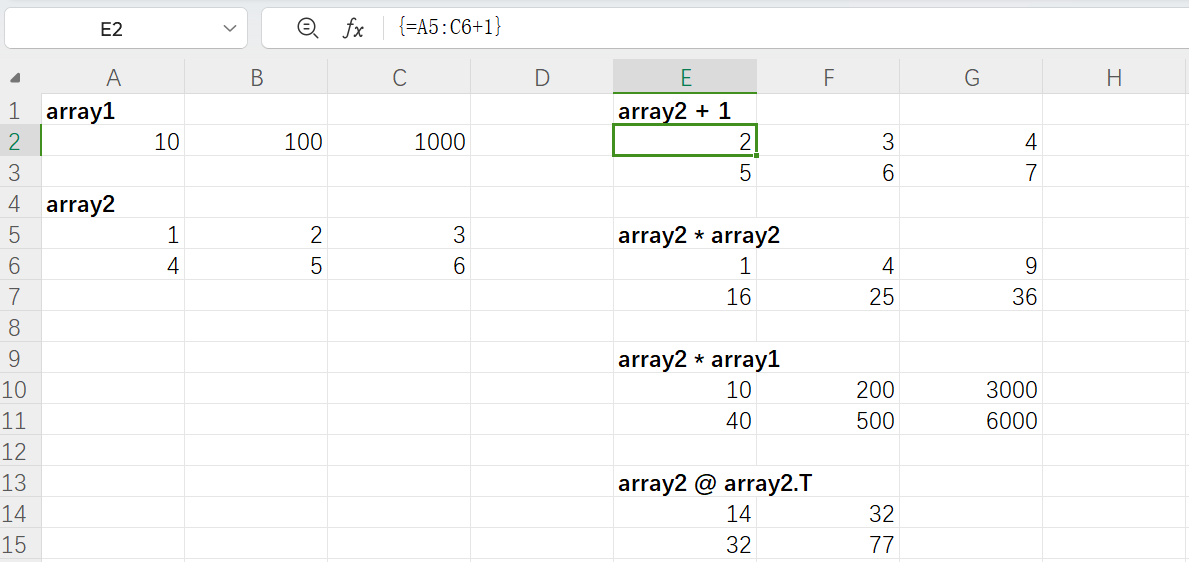

In [ ]:
from PIL import Image

img = Image.open('../pic/array_calculations.png')
img

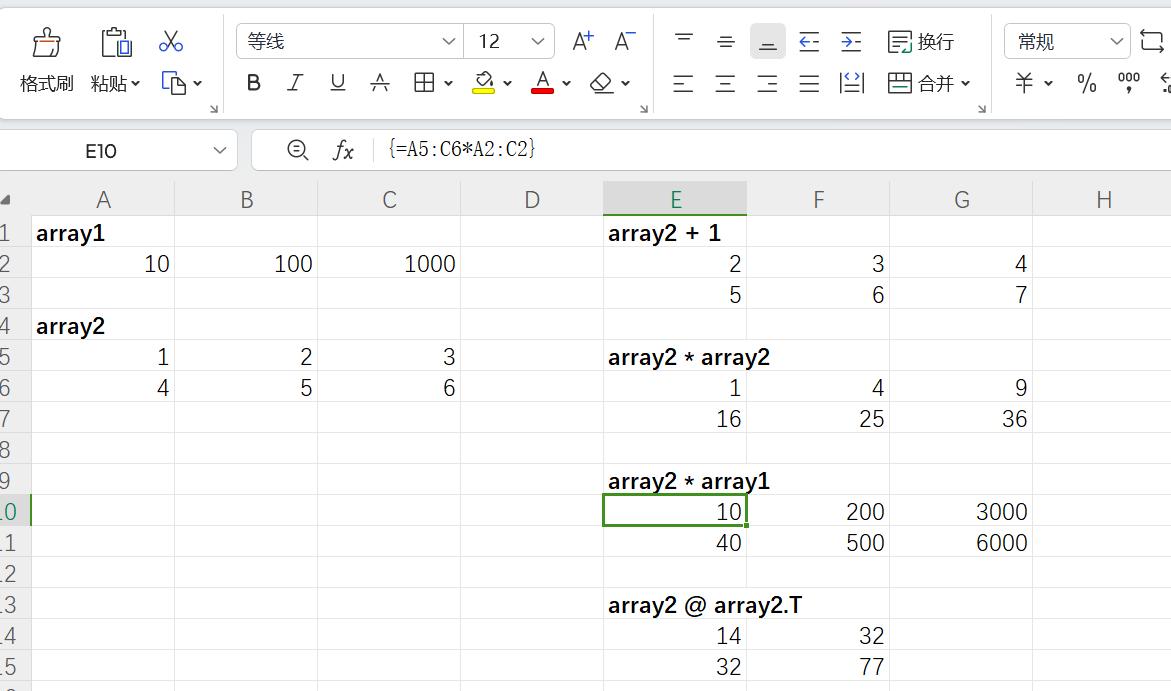

: 

In [ ]:
img = Image.open('../pic/array_calculations_2.png')
img

### 1.3 通用函数

通用函数(universal functio, 简称ufunc)会对Numpy数组中的每个元素执行操作。 如果在Numpy数组中使用Python标准库math模块中的开平方，会得到一个错误（math函数只能对一个标量进行计算）。

In [20]:
import math

In [21]:
math.sqrt(array2)

TypeError: only length-1 arrays can be converted to Python scalars

当然可以写一个嵌套循环， 再把结果构建成一个Numpy数组，如下

In [22]:
np.array([[math.sqrt(i) for i in row] for row in array2])

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

上述方法在计算大数据的时候，速度很慢，因为是一个个元素处理在进行整合，此时Numpy提供了对应的ufunc。 例如：

In [23]:
np.sqrt(array2)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

## 创建和操作数组


我们通过链式索引来访问获取Numpy数组中的特定元素区间， 语法： `numpy_array[row_selection, column_selection]`


In [24]:
# 返回标量
array1[2]

array([3, 4])

In [25]:
# 返回标量
array2[0,0]

1.0

In [27]:
# 返回二维数组
array2[:, 1:]

array([[2., 3.],
       [5., 6.]])

In [28]:
# 返回一维数组
array2[:, 1]

array([2., 5.])